In [22]:
    import pandas as pd
    import numpy as np
    
    import matplotlib.pyplot as plt
    import matplotlib
    import seaborn as sns
    import plotly.express as px
    from sklearn.preprocessing import RobustScaler, StandardScaler
    from sklearn.svm import SVC  # Importing SVC for Support Vector Machine
    
    
    from sklearn.linear_model import LogisticRegression
    from sklearn.metrics import confusion_matrix
    from sklearn.metrics import classification_report
    from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve
    from sklearn.metrics import auc
    
    
    from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
    
    from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
    
    from sklearn.neighbors import KNeighborsClassifier
    from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, RandomForestRegressor
    from xgboost import XGBClassifier
    
    from sklearn.metrics import accuracy_score, f1_score, precision_score, recall_score
    
    from imblearn.over_sampling import SMOTE
    from imblearn.under_sampling import RandomUnderSampler
    
    
    import warnings
    warnings.filterwarnings('ignore')

In [10]:
!pip install xgboost


In [5]:
df_ = pd.read_csv ('creditcard.csv')
df = df_.copy()

In [7]:
df.head()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [12]:
df.shape

(284807, 31)

In [14]:
df.describe()


,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,284807.000000,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,...,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,2.848070e+05,284807.000000,284807.000000
mean,94813.859575,1.168375e-15,3.416908e-16,-1.379537e-15,2.074095e-15,9.604066e-16,1.487313e-15,-5.556467e-16,1.213481e-16,-2.406331e-15,...,1.654067e-16,-3.568593e-16,2.578648e-16,4.473266e-15,5.340915e-16,1.683437e-15,-3.660091e-16,-1.227390e-16,88.349619,0.001727
std,47488.145955,1.958696e+00,1.651309e+00,1.516255e+00,1.415869e+00,1.380247e+00,1.332271e+00,1.237094e+00,1.194353e+00,1.098632e+00,...,7.345240e-01,7.257016e-01,6.244603e-01,6.056471e-01,5.212781e-01,4.822270e-01,4.036325e-01,3.300833e-01,250.120109,0.041527
min,0.000000,-5.640751e+01,-7.271573e+01,-4.832559e+01,-5.683171e+00,-1.137433e+02,-2.616051e+01,-4.355724e+01,-7.321672e+01,-1.343407e+01,...,-3.483038e+01,-1.093314e+01,-4.480774e+01,-2.836627e+00,-1.029540e+01,-2.604551e+00,-2.256568e+01,-1.543008e+01,0.000000,0.000000
25%,54201.500000,-9.203734e-01,-5.985499e-01,-8.903648e-01,-8.486401e-01,-6.915971e-01,-7.682956e-01,-5.540759e-01,-2.086297e-01,-6.430976e-01,...,-2.283949e-01,-5.423504e-01,-1.618463e-01,-3.545861e-01,-3.171451e-01,-3.269839e-01,-7.083953e-02,-5.295979e-02,5.600000,0.000000
50%,84692.000000,1.810880e-02,6.548556e-02,1.798463e-01,-1.984653e-02,-5.433583e-02,-2.741871e-01,4.010308e-02,2.235804e-02,-5.142873e-02,...,-2.945017e-02,6.781943e-03,-1.119293e-02,4.097606e-02,1.659350e-02,-5.213911e-02,1.342146e-03,1.124383e-02,22.000000,0.000000
75%,139320.500000,1.315642e+00,8.037239e-01,1.027196e+00,7.433413e-01,6.119264e-01,3.985649e-01,5.704361e-01,3.273459e-01,5.971390e-01,...,1.863772e-01,5.285536e-01,1.476421e-01,4.395266e-01,3.507156e-01,2.409522e-01,9.104512e-02,7.827995e-02,77.165000,0.000000
max,172792.000000,2.454930e+00,2.205773e+01,9.382558e+00,1.687534e+01,3.480167e+01,7.330163e+01,1.205895e+02,2.000721e+01,1.559499e+01,...,2.720284e+01,1.050309e+01,2.252841e+01,4.584549e+00,7.519589e+00,3.517346e+00,3.161220e+01,3.384781e+01,25691.160000,1.000000


In [16]:
df.isna().sum().sum()


0

In [18]:
fraud_count = df['Class'].value_counts()
fraud_count

Class
0    284315
1       492
Name: count, dtype: int64

In [24]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [26]:
print('Non-fraud: %', round(df['Class'].value_counts()[0] / len(df) * 100 , 2),
    '\nFraud: %', round(df['Class'].value_counts()[1] / len(df) * 100,2))

Non-fraud: % 99.83 
Fraud: % 0.17


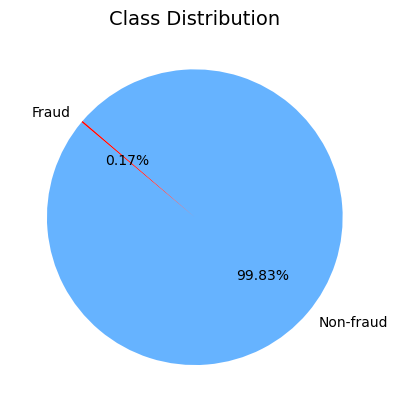

In [28]:
# Calculate the percentages of the classes
fraud_counts = df['Class'].value_counts(normalize=True)

labels = ['Non-fraud', 'Fraud']
plt.pie(fraud_counts, labels=labels, autopct='%1.2f%%', colors=['#66b3ff', 'red'], startangle=140)
plt.title('Class Distribution', fontsize=14)
plt.show()

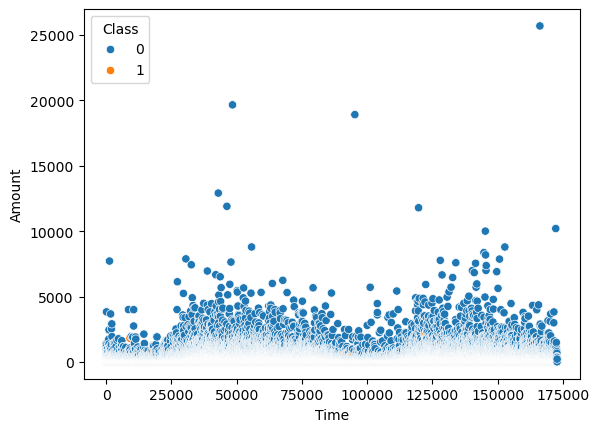

In [30]:
sns.scatterplot(data = df, x = 'Time', y = 'Amount', hue = 'Class') ;


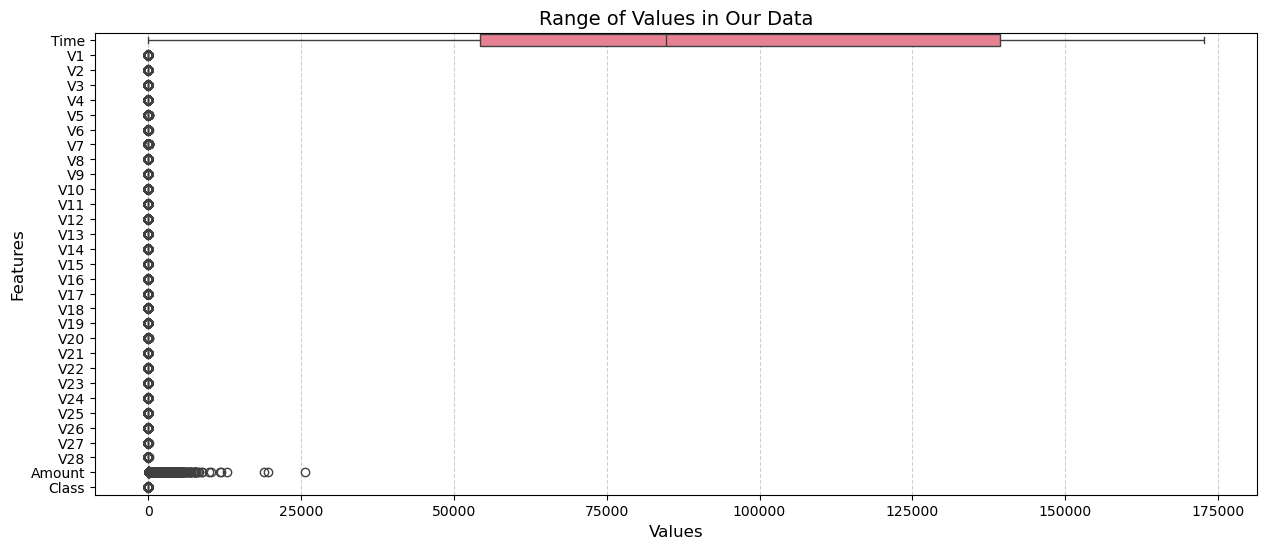

In [34]:
plt.figure(figsize=(15, 6))
sns.boxplot(data=df, orient="h")
plt.title("Range of Values in Our Data", fontsize=14)
plt.xlabel("Values", fontsize=12)
plt.ylabel("Features", fontsize=12)
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()

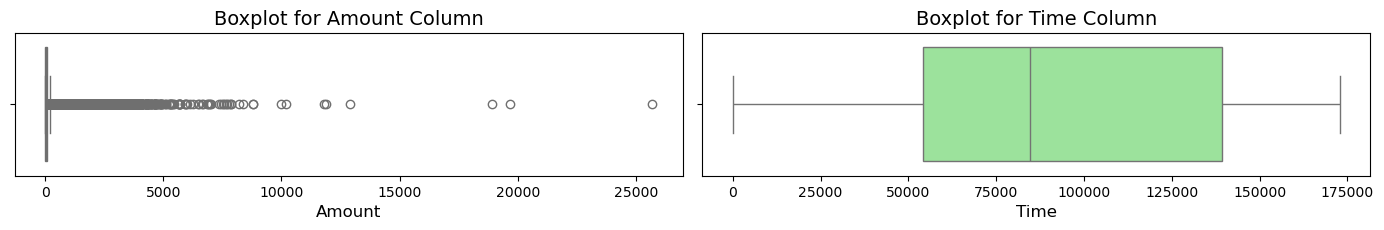

In [36]:
# Boxplot to visualize outliers in the Amount column
plt.figure(figsize=(14, 6))

plt.subplot(3, 2, 1)
sns.boxplot(x=df['Amount'], color='skyblue')
plt.title('Boxplot for Amount Column', fontsize=14)
plt.xlabel('Amount', fontsize=12)

# Boxplot to visualize outliers in the Time column
plt.subplot(3, 2, 2)
sns.boxplot(x=df['Time'], color='lightgreen')
plt.title('Boxplot for Time Column', fontsize=14)
plt.xlabel('Time', fontsize=12)

plt.tight_layout()
plt.show()

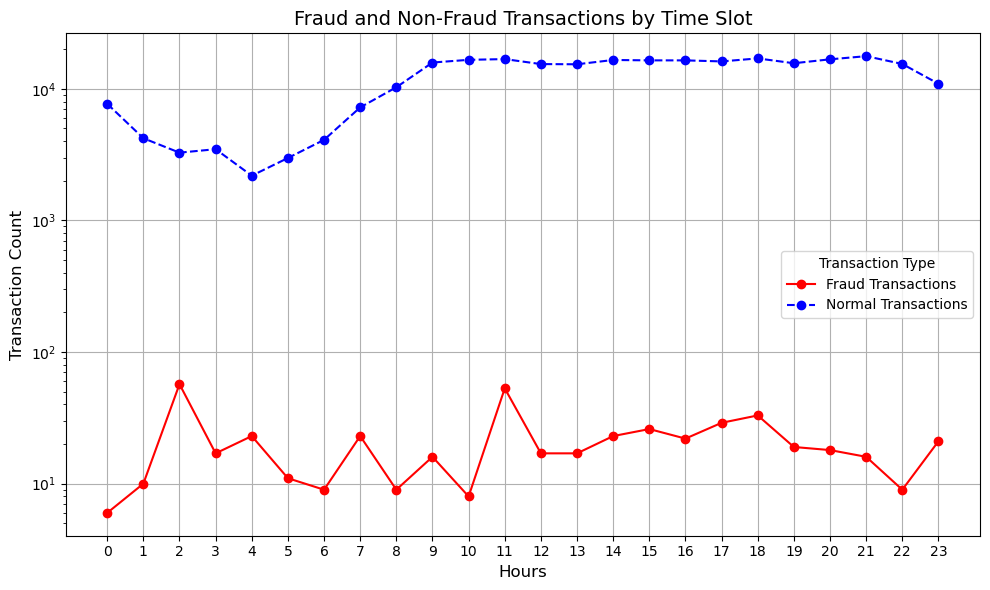

In [38]:
# Convert the 'Time' column to create time slots
hourly_data = df.copy()
hourly_data['Hour'] = pd.to_datetime(hourly_data['Time'], unit='s').dt.hour

# Grouping by time slots for fraud and non-fraud transactions
fraud_data = hourly_data[hourly_data['Class'] == 1].groupby('Hour').size()  # Fraud transactions
non_fraud_data = hourly_data[hourly_data['Class'] == 0].groupby('Hour').size()  # Non-fraud transactions

# Plotting the graph
fig, ax = plt.subplots(figsize=(10, 6))
ax.set_yscale('log')  # Sets the y-axis to a logarithmic scale.

# Plot fraud transactions
ax.plot(fraud_data.index, fraud_data.values, '-o', label='Fraud Transactions', c='red')

# Plot non-fraud transactions
ax.plot(non_fraud_data.index, non_fraud_data.values, '--o', label='Normal Transactions', c='blue')

# Title and labels
ax.set_title('Fraud and Non-Fraud Transactions by Time Slot', fontsize=14)
ax.set_xlabel('Hours', fontsize=12)
ax.set_ylabel('Transaction Count', fontsize=12)

# Grid, legend, and x-axis adjustments
ax.grid(True)
plt.xticks(range(24))  # Display time slots from 0-23
plt.legend(title='Transaction Type')

# Show the plot
plt.tight_layout()
plt.show()

<Axes: xlabel='Log_Amount', ylabel='Density'>

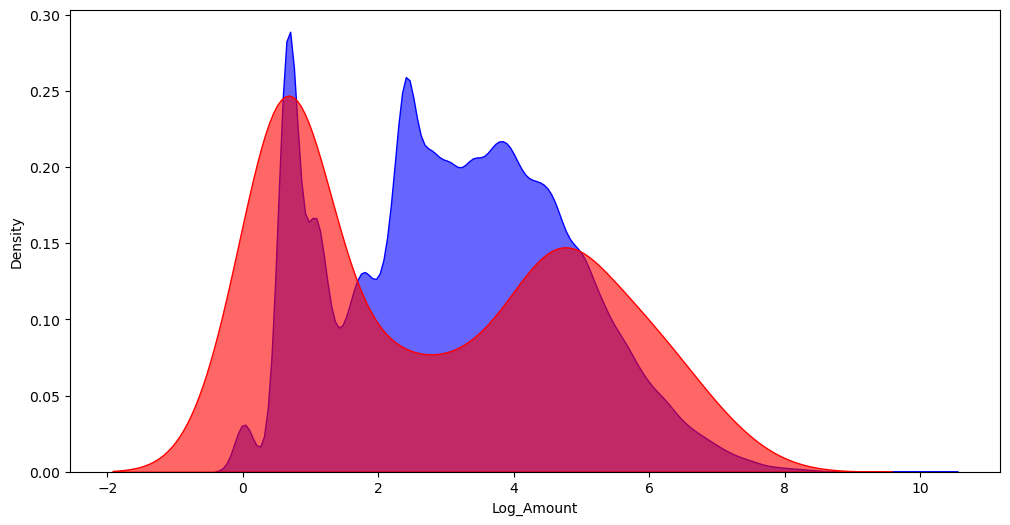

In [40]:
# Convert the data to logarithmic scale (1 is added to avoid 0 values)
df['Log_Amount'] = np.log1p(df['Amount'])  # log1p(x) = log(x + 1)

# Separate fraud and non-fraud transactions
fraud_amount = df[df['Class'] == 1]['Log_Amount']
non_fraud_amount = df[df['Class'] == 0]['Log_Amount']

# Set the figure size
plt.figure(figsize=(12, 6))

# KDE plot for Non-Fraud (Normal Transactions)
sns.kdeplot(non_fraud_amount, fill=True, color="blue", label="Normal Transactions", alpha=0.6)

# KDE plot for Fraud (Fraud Transactions)
sns.kdeplot(fraud_amount, fill=True, color="red", label="Fraud Transactions", alpha=0.6)

In [42]:
# Feature Scaling
rob_scaler = RobustScaler()
df['scaled_time'] = rob_scaler.fit_transform(df['Time'].values.reshape(-1, 1))
df['scaled_amount'] = rob_scaler.fit_transform(df['Amount'].values.reshape(-1, 1))

# Time ve Amount sütunlarını kaldırıyoruz
df.drop(['Time', 'Amount'], axis=1, inplace=True)

# Sütun sıralamasını düzenliyoruz
columns_order = ['scaled_time', 'scaled_amount'] + [col for col in df.columns if col not in ['scaled_time', 'scaled_amount']]
df = df[columns_order]

df.head()

,scaled_time,scaled_amount,V1,V2,V3,V4,V5,V6,V7,V8,...,V21,V22,V23,V24,V25,V26,V27,V28,Class,Log_Amount
0,-0.994983,1.783274,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,5.014760
1,-0.994983,-0.269825,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,1.305626
2,-0.994972,4.983721,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,5.939276
3,-0.994972,1.418291,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,4.824306
4,-0.994960,0.670579,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,4.262539


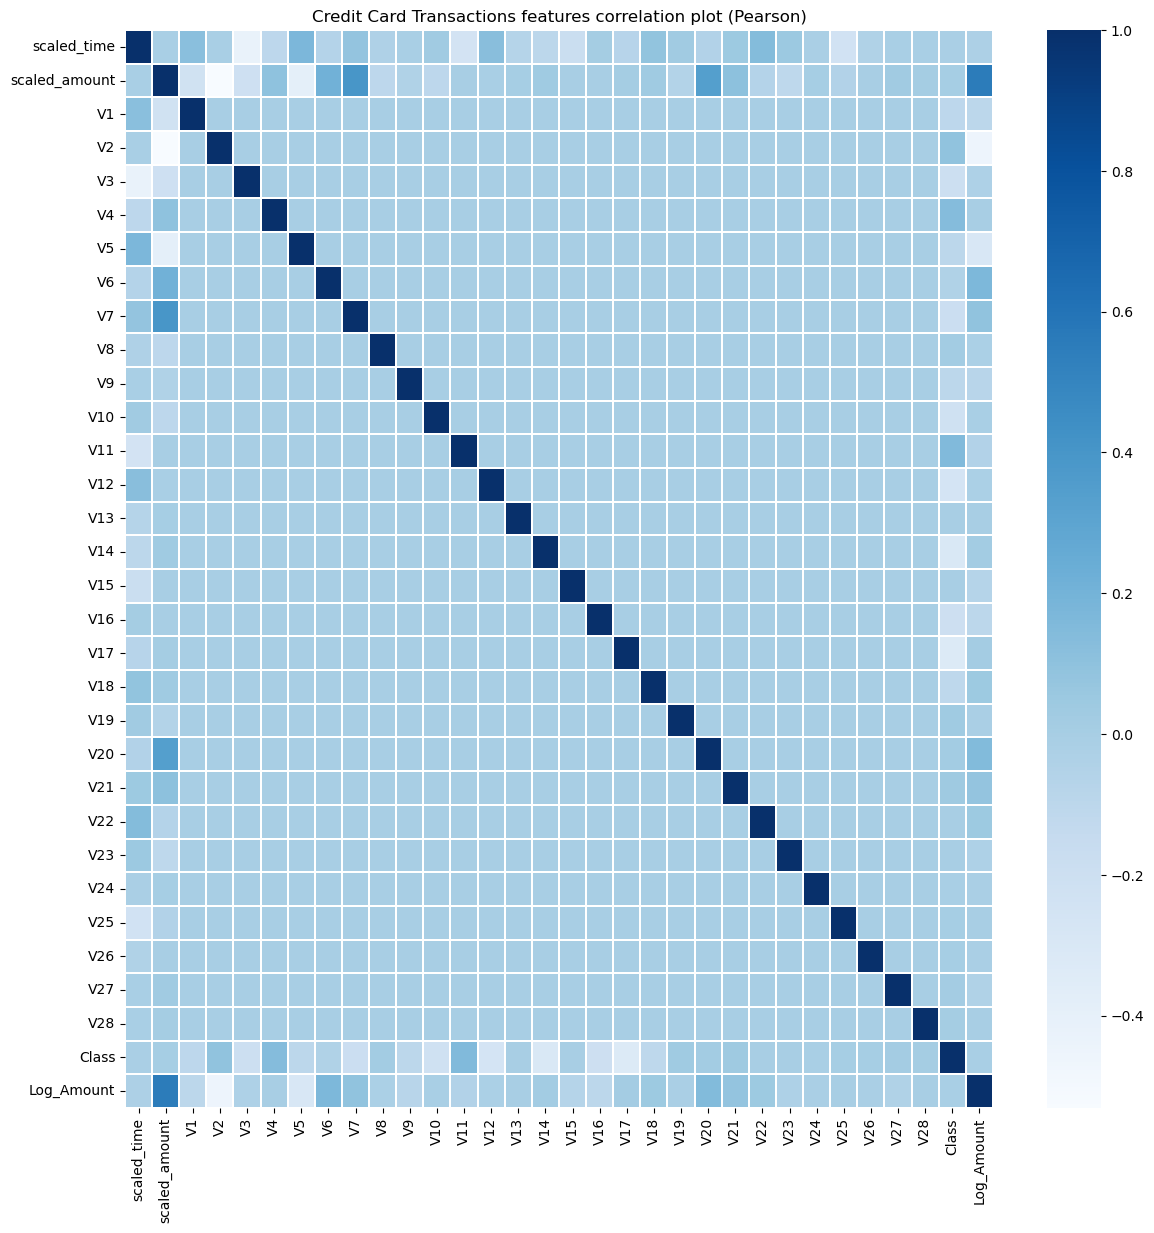

In [45]:
plt.figure(figsize = (14,14))
plt.title('Credit Card Transactions features correlation plot (Pearson)')
corr = df.corr()
sns.heatmap(corr,xticklabels=corr.columns,yticklabels=corr.columns,linewidths=.1,cmap="Blues")
plt.show()

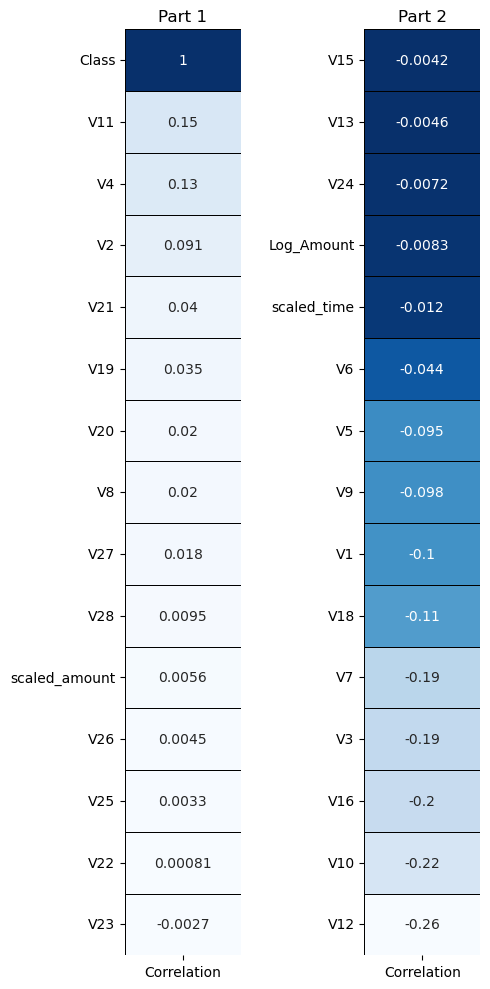

In [47]:
corr = df.corrwith(df['Class']).sort_values(ascending = False).to_frame()
corr.columns = ['Correlation']
fig,ax = plt.subplots(nrows = 1,ncols = 2,figsize = (5,10))

plt.subplot(1,2,1)
sns.heatmap(corr.iloc[:15,:],annot = True,cmap="Blues",linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 1')

plt.subplot(1,2,2)
sns.heatmap(corr.iloc[15:30],annot = True,cmap="Blues",linewidths = 0.4,linecolor = 'black',cbar = False)
plt.title('Part 2')

fig.tight_layout(w_pad = 2)

In [49]:
df1 = df[['V11','V4','V1','V18','V7','V3','V16','V10','V12','V12','V12','V14','Class']].copy(deep = True)
df1.head()

,V11,V4,V1,V18,V7,V3,V16,V10,V12,V12,V12,V14,Class
0,-0.551600,1.378155,-1.359807,0.025791,0.239599,2.536347,-0.470401,0.090794,-0.617801,-0.617801,-0.617801,-0.311169,0
1,1.612727,0.448154,1.191857,-0.183361,-0.078803,0.166480,0.463917,-0.166974,1.065235,1.065235,1.065235,-0.143772,0
2,0.624501,0.379780,-1.358354,-0.121359,0.791461,1.773209,-2.890083,0.207643,0.066084,0.066084,0.066084,-0.165946,0
3,-0.226487,-0.863291,-0.966272,1.965775,0.237609,1.792993,-1.059647,-0.054952,0.178228,0.178228,0.178228,-0.287924,0
4,-0.822843,0.403034,-1.158233,-0.038195,0.592941,1.548718,-0.451449,0.753074,0.538196,0.538196,0.538196,-1.119670,0


In [51]:
# Selecting features and target variable
X = df1.drop(columns=['Class'])  # All columns except the class to be predicted
y = df1['Class']

# Splitting the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [53]:
# Logistic Regression model
logistic_model = LogisticRegression(max_iter=6000, solver='saga')
logistic_model.fit(X_train, y_train)

# Prediction on the test set
y_pred = logistic_model.predict(X_test)


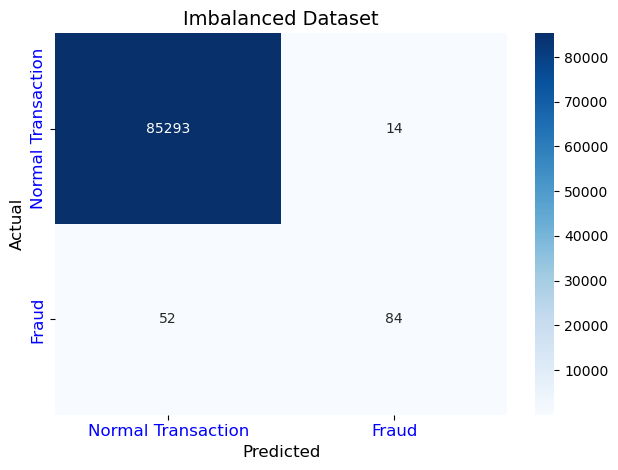

In [55]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    # Labels for axes
    class_names = ['Normal Transaction', 'Fraud']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)

    plt.title(title, fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)

    plt.xticks(fontsize=12, color="blue")
    plt.yticks(fontsize=12, color="blue")

    plt.tight_layout()
    plt.show()

# Plotting the graph
plot_confusion_matrix(y_test, y_pred, "Imbalanced Dataset")


In [57]:
logistic_model.score(X_train, y_train)
print("Imbalanced dataset results:")
print(classification_report(y_test, y_pred, target_names=['Normal Transaction', 'Fraud']))


Imbalanced dataset results:
                    precision    recall  f1-score   support

Normal Transaction       1.00      1.00      1.00     85307
             Fraud       0.86      0.62      0.72       136

          accuracy                           1.00     85443
         macro avg       0.93      0.81      0.86     85443
      weighted avg       1.00      1.00      1.00     85443



In [59]:
smote = SMOTE(random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

unique, count =np.unique(y_train_smote, return_counts=True)
y_train_smote_value_count = { k:v for (k,v) in zip(unique, count)}
y_train_smote_value_count

{0: 199008, 1: 199008}

In [61]:
model_smote = LogisticRegression(solver='saga', max_iter=6000, random_state=42)  # Used saga solver
model_smote.fit(X_train_smote, y_train_smote)

# Prediction on the test set
y_pred_smote = model_smote.predict(X_test)


In [63]:
accuricy_smote = model_smote.score(X_train_smote,y_train_smote)
print (f"Model accuracy score= {accuricy_smote}")

Model accuracy score= 0.9354649059334298


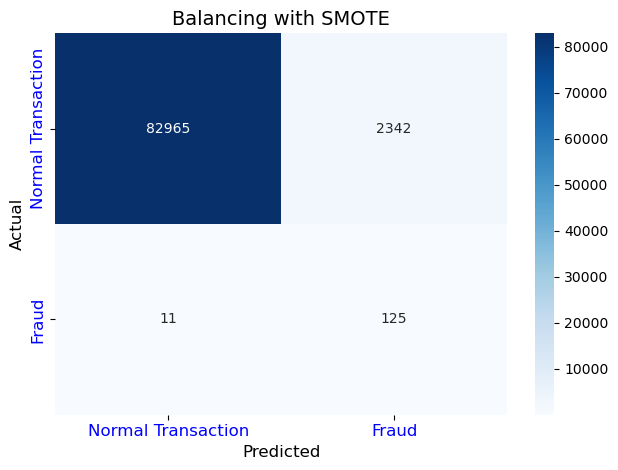

In [65]:
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)

    # Labels for axes
    class_names = ['Normal Transaction', 'Fraud']

    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
                xticklabels=class_names, yticklabels=class_names)

    plt.title(title, fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)

    plt.xticks(fontsize=12, color="blue")
    plt.yticks(fontsize=12, color="blue")

    plt.tight_layout()
    plt.show()

# Plotting the graph
plot_confusion_matrix(y_test, y_pred_smote, "Balancing with SMOTE")


In [67]:
# Performance evaluation
print("Results with SMOTE balancing:")
print(classification_report(y_test, y_pred_smote, target_names=['Normal Transaction', 'Fraud']))


Results with SMOTE balancing:
                    precision    recall  f1-score   support

Normal Transaction       1.00      0.97      0.99     85307
             Fraud       0.05      0.92      0.10       136

          accuracy                           0.97     85443
         macro avg       0.53      0.95      0.54     85443
      weighted avg       1.00      0.97      0.98     85443



In [69]:
undersampler = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = undersampler.fit_resample(X_train, y_train)

# Logistic Regression model
model_under = LogisticRegression(solver='saga', max_iter=6000, random_state=42)
model_under.fit(X_train_under, y_train_under)

# Prediction on test set
y_pred_under = model_under.predict(X_test)


In [71]:
accuricy_under = model_under.score(X_train_under,y_train_under)
print (f"Model accuracy score= {accuricy_under}")


Model accuracy score= 0.9339887640449438


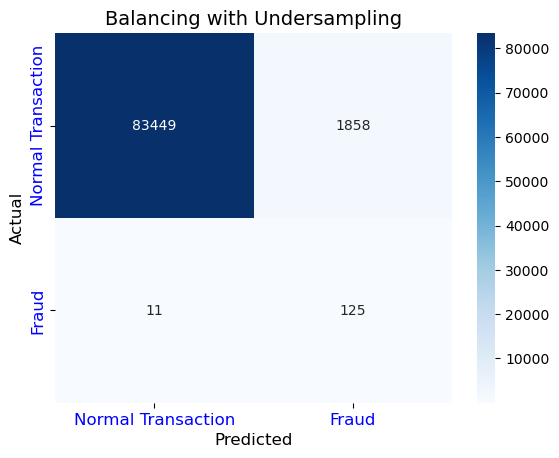

In [73]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix

# Confusion Matrix visualization
matplotlib.rcParams['text.usetex'] = False

def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Normal Transaction', 'Fraud'], yticklabels=['Normal Transaction', 'Fraud'])
    plt.title(title, fontsize=14)
    plt.xlabel('Predicted', fontsize=12)
    plt.ylabel('Actual', fontsize=12)

    plt.xticks(fontsize=12, color="blue")
    plt.yticks(fontsize=12, color="blue")
    plt.yticks(fontsize=12, color="blue")

    plt.show()

# Confusion matrix plot
plot_confusion_matrix(y_test, y_pred_under, "Balancing with Undersampling")


In [75]:
# Performance evaluation
print("Results with Undersampling:")
print(classification_report(y_test, y_pred_under))


Results with Undersampling:
              precision    recall  f1-score   support

           0       1.00      0.98      0.99     85307
           1       0.06      0.92      0.12       136

    accuracy                           0.98     85443
   macro avg       0.53      0.95      0.55     85443
weighted avg       1.00      0.98      0.99     85443



In [77]:
from sklearn.ensemble import RandomForestClassifier

# Modeli oluştur
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)

# Modeli eğit
rf_model.fit(X_train_smote, y_train_smote)

# Test seti üzerinde tahmin yap
y_pred_rf = rf_model.predict(X_test)
y_pred_proba_rf = rf_model.predict_proba(X_test)[:, 1]

Before Undersampling, counts of label '1': 356
Before Undersampling, counts of label '0': 199008 

After Undersampling, the shape of train_x: (712, 12)
After Undersampling, the shape of train_y: (712,) 

After Undersampling, counts of label '1', %: 50.0
After Undersampling, counts of label '0', %: 50.0


<Axes: xlabel='Class', ylabel='count'>

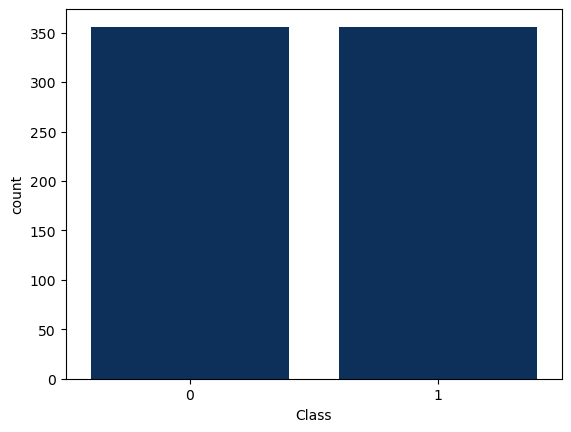

In [81]:
# FOR df1 - Undersampling

from imblearn.under_sampling import RandomUnderSampler
print("Before Undersampling, counts of label '1': {}".format(sum(y_train==1)))
print("Before Undersampling, counts of label '0': {} \n".format(sum(y_train==0)))

# Perform random undersampling
rus = RandomUnderSampler(random_state=42)
X_train_under, y_train_under = rus.fit_resample(X_train, y_train)

print('After Undersampling, the shape of train_x: {}'.format(X_train_under.shape))
print('After Undersampling, the shape of train_y: {} \n'.format(y_train_under.shape))

print("After Undersampling, counts of label '1', %: {}".format(sum(y_train_under==1)/len(y_train_under)*100.0))
print("After Undersampling, counts of label '0', %: {}".format(sum(y_train_under==0)/len(y_train_under)*100.0))

sns.countplot(x=y_train_under, data=df, palette=[('#002F67')])



Accuracy Score: 0.9994148145547324
Confusion Matrix:
 [[85275    32]
 [   18   118]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.79      0.87      0.83       136

    accuracy                           1.00     85443
   macro avg       0.89      0.93      0.91     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9716120461806115


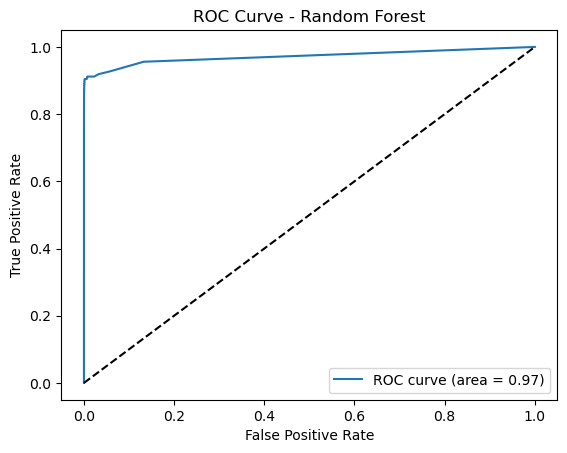

In [83]:
# Confusion Matrix ve Classification Report
print("Accuracy Score:", accuracy_score(y_test, y_pred_rf))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_rf))
print("Classification Report:\n", classification_report(y_test, y_pred_rf))

# ROC-AUC Skoru
auc_rf = roc_auc_score(y_test, y_pred_proba_rf)
print("ROC-AUC Score:", auc_rf)

# ROC Curve
fpr_rf, tpr_rf, _ = roc_curve(y_test, y_pred_proba_rf)
plt.plot(fpr_rf, tpr_rf, label="ROC curve (area = %0.2f)" % auc_rf)
plt.plot([0, 1], [0, 1], "k--")  # Rastgele tahmin çizgisi
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - Random Forest")
plt.legend(loc="lower right")
plt.show()

In [85]:
# Scaling the data
scaler = StandardScaler()
X_train_smote = scaler.fit_transform(X_train)
X_test_smote = scaler.transform(X_test)

# Define and train SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42, probability=True)
svm_model.fit(X_train_smote, y_train)

y_pred = svm_model.predict(X_test_smote)
y_pred_proba = svm_model.predict_proba(X_test_smote)[:, 1]

# Performance metrics
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
print("Classification Report:\n", classification_report(y_test, y_pred))


Accuracy Score: 0.9995084442259752
Confusion Matrix:
 [[85304     3]
 [   39    97]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.97      0.71      0.82       136

    accuracy                           1.00     85443
   macro avg       0.98      0.86      0.91     85443
weighted avg       1.00      1.00      1.00     85443



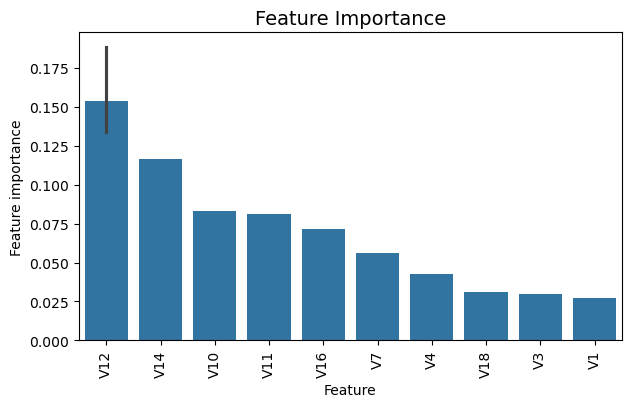

In [87]:
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming X_train and y_train are your training data and labels
# You need to train a model first
clf = RandomForestClassifier(random_state=42)
clf.fit(X_train, y_train)  # Fit the model on training data

# Get the feature names from the training data (assuming it's a pandas DataFrame)
predictors = X_train.columns

# Create a DataFrame with the feature importance from the trained model
tmp = pd.DataFrame({'Feature': predictors, 'Feature importance': clf.feature_importances_})

# Sort the features by importance
tmp = tmp.sort_values(by='Feature importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(7, 4))
plt.title('Feature Importance', fontsize=14)
s = sns.barplot(x='Feature', y='Feature importance', data=tmp)
s.set_xticklabels(s.get_xticklabels(), rotation=90)
plt.show()


ROC-AUC Score: 0.9562649675669675


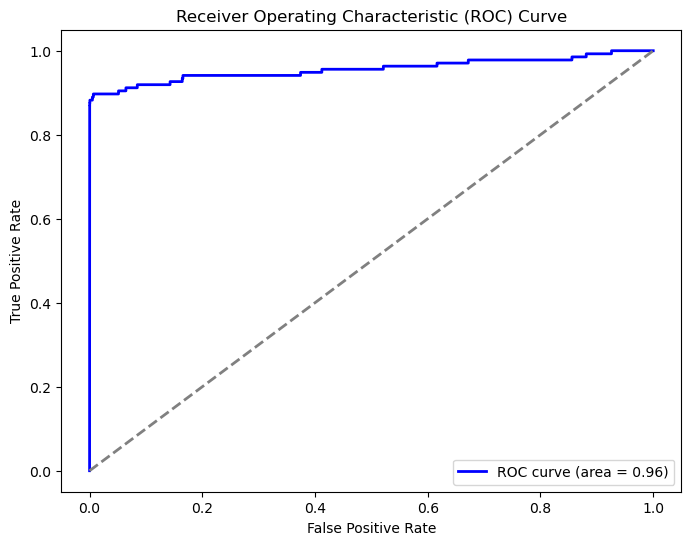

In [95]:
# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)
print("ROC-AUC Score:", roc_auc)

# Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='gray', lw=2, linestyle='--')  # Random classifier line
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()


In [97]:
smote = SMOTE(sampling_strategy='auto', random_state=42)
X_train_smote, y_train_smote = smote.fit_resample(X_train, y_train)

print("New X_train_smote shape:", X_train_smote.shape)
print("New y_train_smote shape:", y_train_smote.shape)


New X_train_smote shape: (398016, 12)
New y_train_smote shape: (398016,)


Accuracy: 0.9970974801914727
Confusion Matrix:
 [[85072   235]
 [   13   123]]
Classification Report:
               precision    recall  f1-score   support

           0       1.00      1.00      1.00     85307
           1       0.34      0.90      0.50       136

    accuracy                           1.00     85443
   macro avg       0.67      0.95      0.75     85443
weighted avg       1.00      1.00      1.00     85443

ROC-AUC Score: 0.9514393601931845


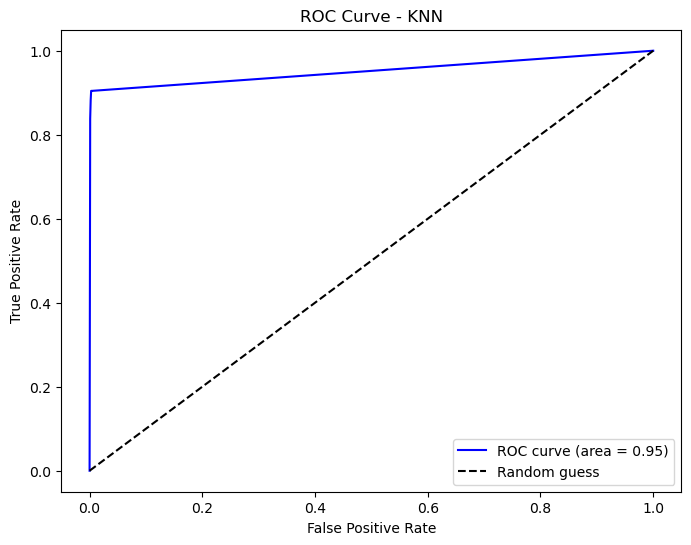

In [99]:
# KNN Model
knn = KNeighborsClassifier(n_neighbors=5, algorithm='auto')  # 'auto', 'ball_tree', 'kd_tree', 'brute' options
knn.fit(X_train_smote, y_train_smote)

# Prediction with test data
y_pred_knn = knn.predict(X_test)
y_pred_proba_knn = knn.predict_proba(X_test)[:, 1]  # Get probabilities for class 1

# Model evaluation
print("Accuracy:", accuracy_score(y_test, y_pred_knn))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_knn))
print("Classification Report:\n", classification_report(y_test, y_pred_knn))

# ROC-AUC Score
roc_auc = roc_auc_score(y_test, y_pred_proba_knn)
print("ROC-AUC Score:", roc_auc)

# ROC Curve
fpr_knn, tpr_knn, _ = roc_curve(y_test, y_pred_proba_knn)
auc_knn = auc(fpr_knn, tpr_knn)

# ROC Curve plotting
plt.figure(figsize=(8, 6))
plt.plot(fpr_knn, tpr_knn, label="ROC curve (area = %0.2f)" % auc_knn, color="blue")
plt.plot([0, 1], [0, 1], "k--", label="Random guess")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve - KNN")
plt.legend(loc="lower right")
plt.show()
